

---


#**MARKET** **CAMPAIGN** **FOR** **BANKING** **PRODUCTS**

---



The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


The objective of this is to predict the likelihood of liablity customer buying personal loan.

**Information** **on** **the** **given** **data** :
  The dataset provided contains information regaarding the possible cutomers and their relationship with the bank along with the customer's response to personal loan.

The ultimate aim of our project is to build a model which helps the bank identify many potential customers who have a high statistical probablity of applying for a personal loan.



---


# **IMPORTING THE REQUIRED LIBRARIES**


---



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="dark")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---


# **READING THE DATA**


---




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
import io
file = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))




---


# **FINDING OUT THE DATA INFORMATION**


---



In [ ]:
#To check data shape
file.shape

(5000, 14)

In [ ]:
#To check data columns
file.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
#To display first 10 rows
file.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
#To display bottom 10 rows
file.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1




---


Based on the information observed, one can analyse the details of 5000 customers. The dataset has 14 attributes.
Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: Years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
*  Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

The data provides us the demographic information of the potential buyers like age,family,income,experience and zipcode. Apart from this,we also observe the relationship between the customers and the banks in terms of CCAvg, Credit Card,Securities account,Online transcations , Mortgage ,CD account and Personal loan.


---





---


# **CHECKING FOR DATATYPES AND NULL VALUES**


---



In [ ]:
#To check datatype
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#To check null
file.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64



---


The data is numeric in nature.

From the above information we can conclude that all the attributes except CCAvg are of the datatype int whereas CCAvg has the datatype float.

There are no null values in our data.


---



**STATASTICAL SUMMARY OF THE DATA**

In [ ]:
#To check for statistical summary
file.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000




---


 Since we experience cannot be negative,we need to remove/replace faulty data from the dataset.


 From the above data we can notice Age and Experience being closely related.Hence we check for correlation


---



In [ ]:
#To check correlation
experience=file['Experience']
age=file['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321



---


It can observed from the calculations that age and experience are highly correlated.


---



In [ ]:
corr= file.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


**DROPPING UNNECSSARY COLUMNS**

In [ ]:
#To drop irrelevant columns
file=file.drop(['ID','Experience'],axis=1)
file.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1




---


 Since age and experience is highly correlated,we drop experience from the data.
We also drop the ID as it does not provide any sigificance to the dataset.


  Now the dataset is clean.


---


  \



---


# **FINDING UNIQUE VALUES**


---



In [ ]:
#Tofind unique data in each column
file.nunique()


Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64



---


This data shows the number of unique values in each attribute.


---





---


# **CHECKING INFORMATION**


---



In [ ]:
#Number of people with zero mortgage
(file.Mortgage==0).sum()

3462



---


There are 3462 customers with zero mortgage.


---



In [ ]:
#No of people with zero credit card spending per month
(file.CCAvg==0).sum()

106



---


 There are 106 people with zero credit card spending per month.


---



In [ ]:
#Value counts of categorical data
file.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64



---


2096 of the potential customers who undergaduates.

1501 of the potential customers are graduates.


1403 of the potential customers are professional/advanced workers.


---



In [ ]:
file.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64



---


There are 1472 potential customers with one member in their family.

There are 1296 potential customers with two members in their family.

There are 1222 potential custoomers with three members in their family.

There are 1010 potential customers with four members in their family.


---



In [ ]:
file['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64



---


There are 4520 potential customers with no personal loan.

There are 480 potential customers with personal loan.


---



In [ ]:
file['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64



---
There are 4478 potential customers with no securities account.

There are 522 potential customers with existing securities account


---




In [ ]:
file['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64



---
There are 4698 potential customers with no CD account.

There are 302 potential customers with existing CD aacount


---




In [ ]:
file['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64



---
There are 3530 potential customers with no credit card.

There are 1470 potential customers with credit card(s)


---





In [ ]:
file['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64



---
There are 2984 potential customers with online account(s).

There are 2016 potential customers with no online account(s)


---




---





---


#**UNIVARATE ANALYSIS**


---



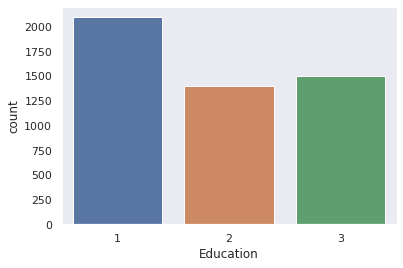

In [ ]:
#Education count
sns.countplot(file.Education);

Most of the potential customers have one member in their family.

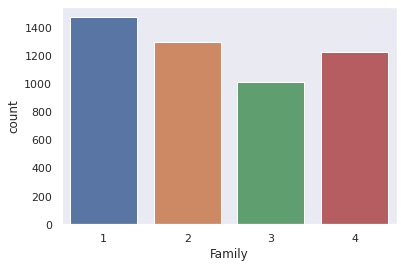

In [ ]:
#Education Family
sns.countplot(file.Family)

Most of the potential customers have education level 1(undergraduate).

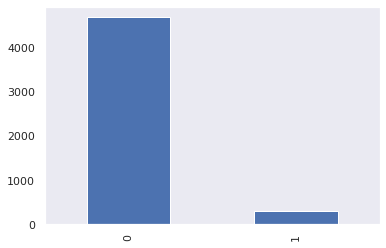

In [ ]:
#CD Account count
file['CD Account'].value_counts().plot(kind = 'bar')

Most of the potential customers have no CD Account(s).

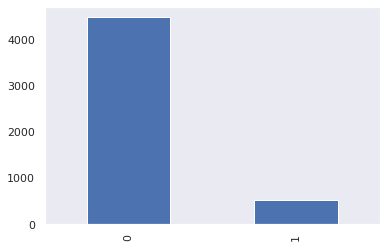

In [ ]:
#Securities Account count
file['Securities Account'].value_counts().plot(kind = 'bar')

Most of the potential customers have no securities account(s).

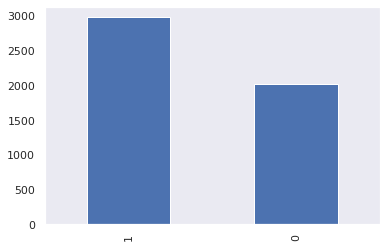

In [ ]:
#Online account count
file['Online'].value_counts().plot( kind = 'bar')

Most of the potential customers have online account(s).

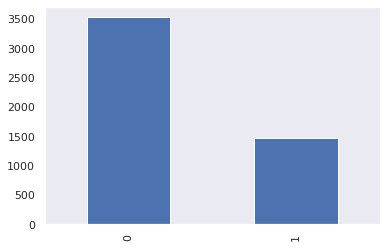

In [ ]:
#Credit card count
file['CreditCard'].value_counts().plot(kind = 'bar')

Most of the potential customers have no credit card(s).

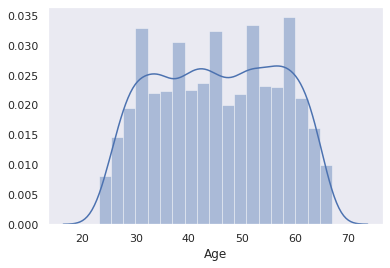

In [ ]:
#Age count
sns.distplot(file.Age);

The age is normaly distrubuted.

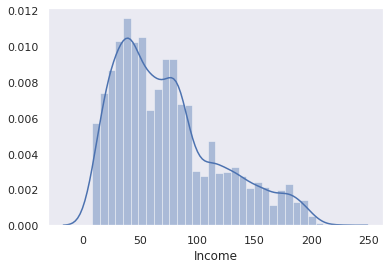

In [ ]:
#Income account
sns.distplot(file.Income);

The  income is slightly skewed.

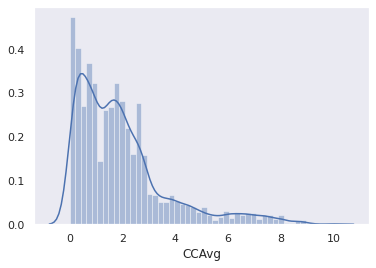

In [ ]:
#CCAvg count
sns.distplot(file.CCAvg);

The CCAvg count is slightly skewed.

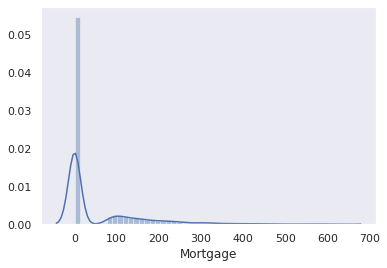

In [ ]:
#Mortgage Account
sns.distplot(file.Mortgage);




---
The mortgage count is higly skewed.



---



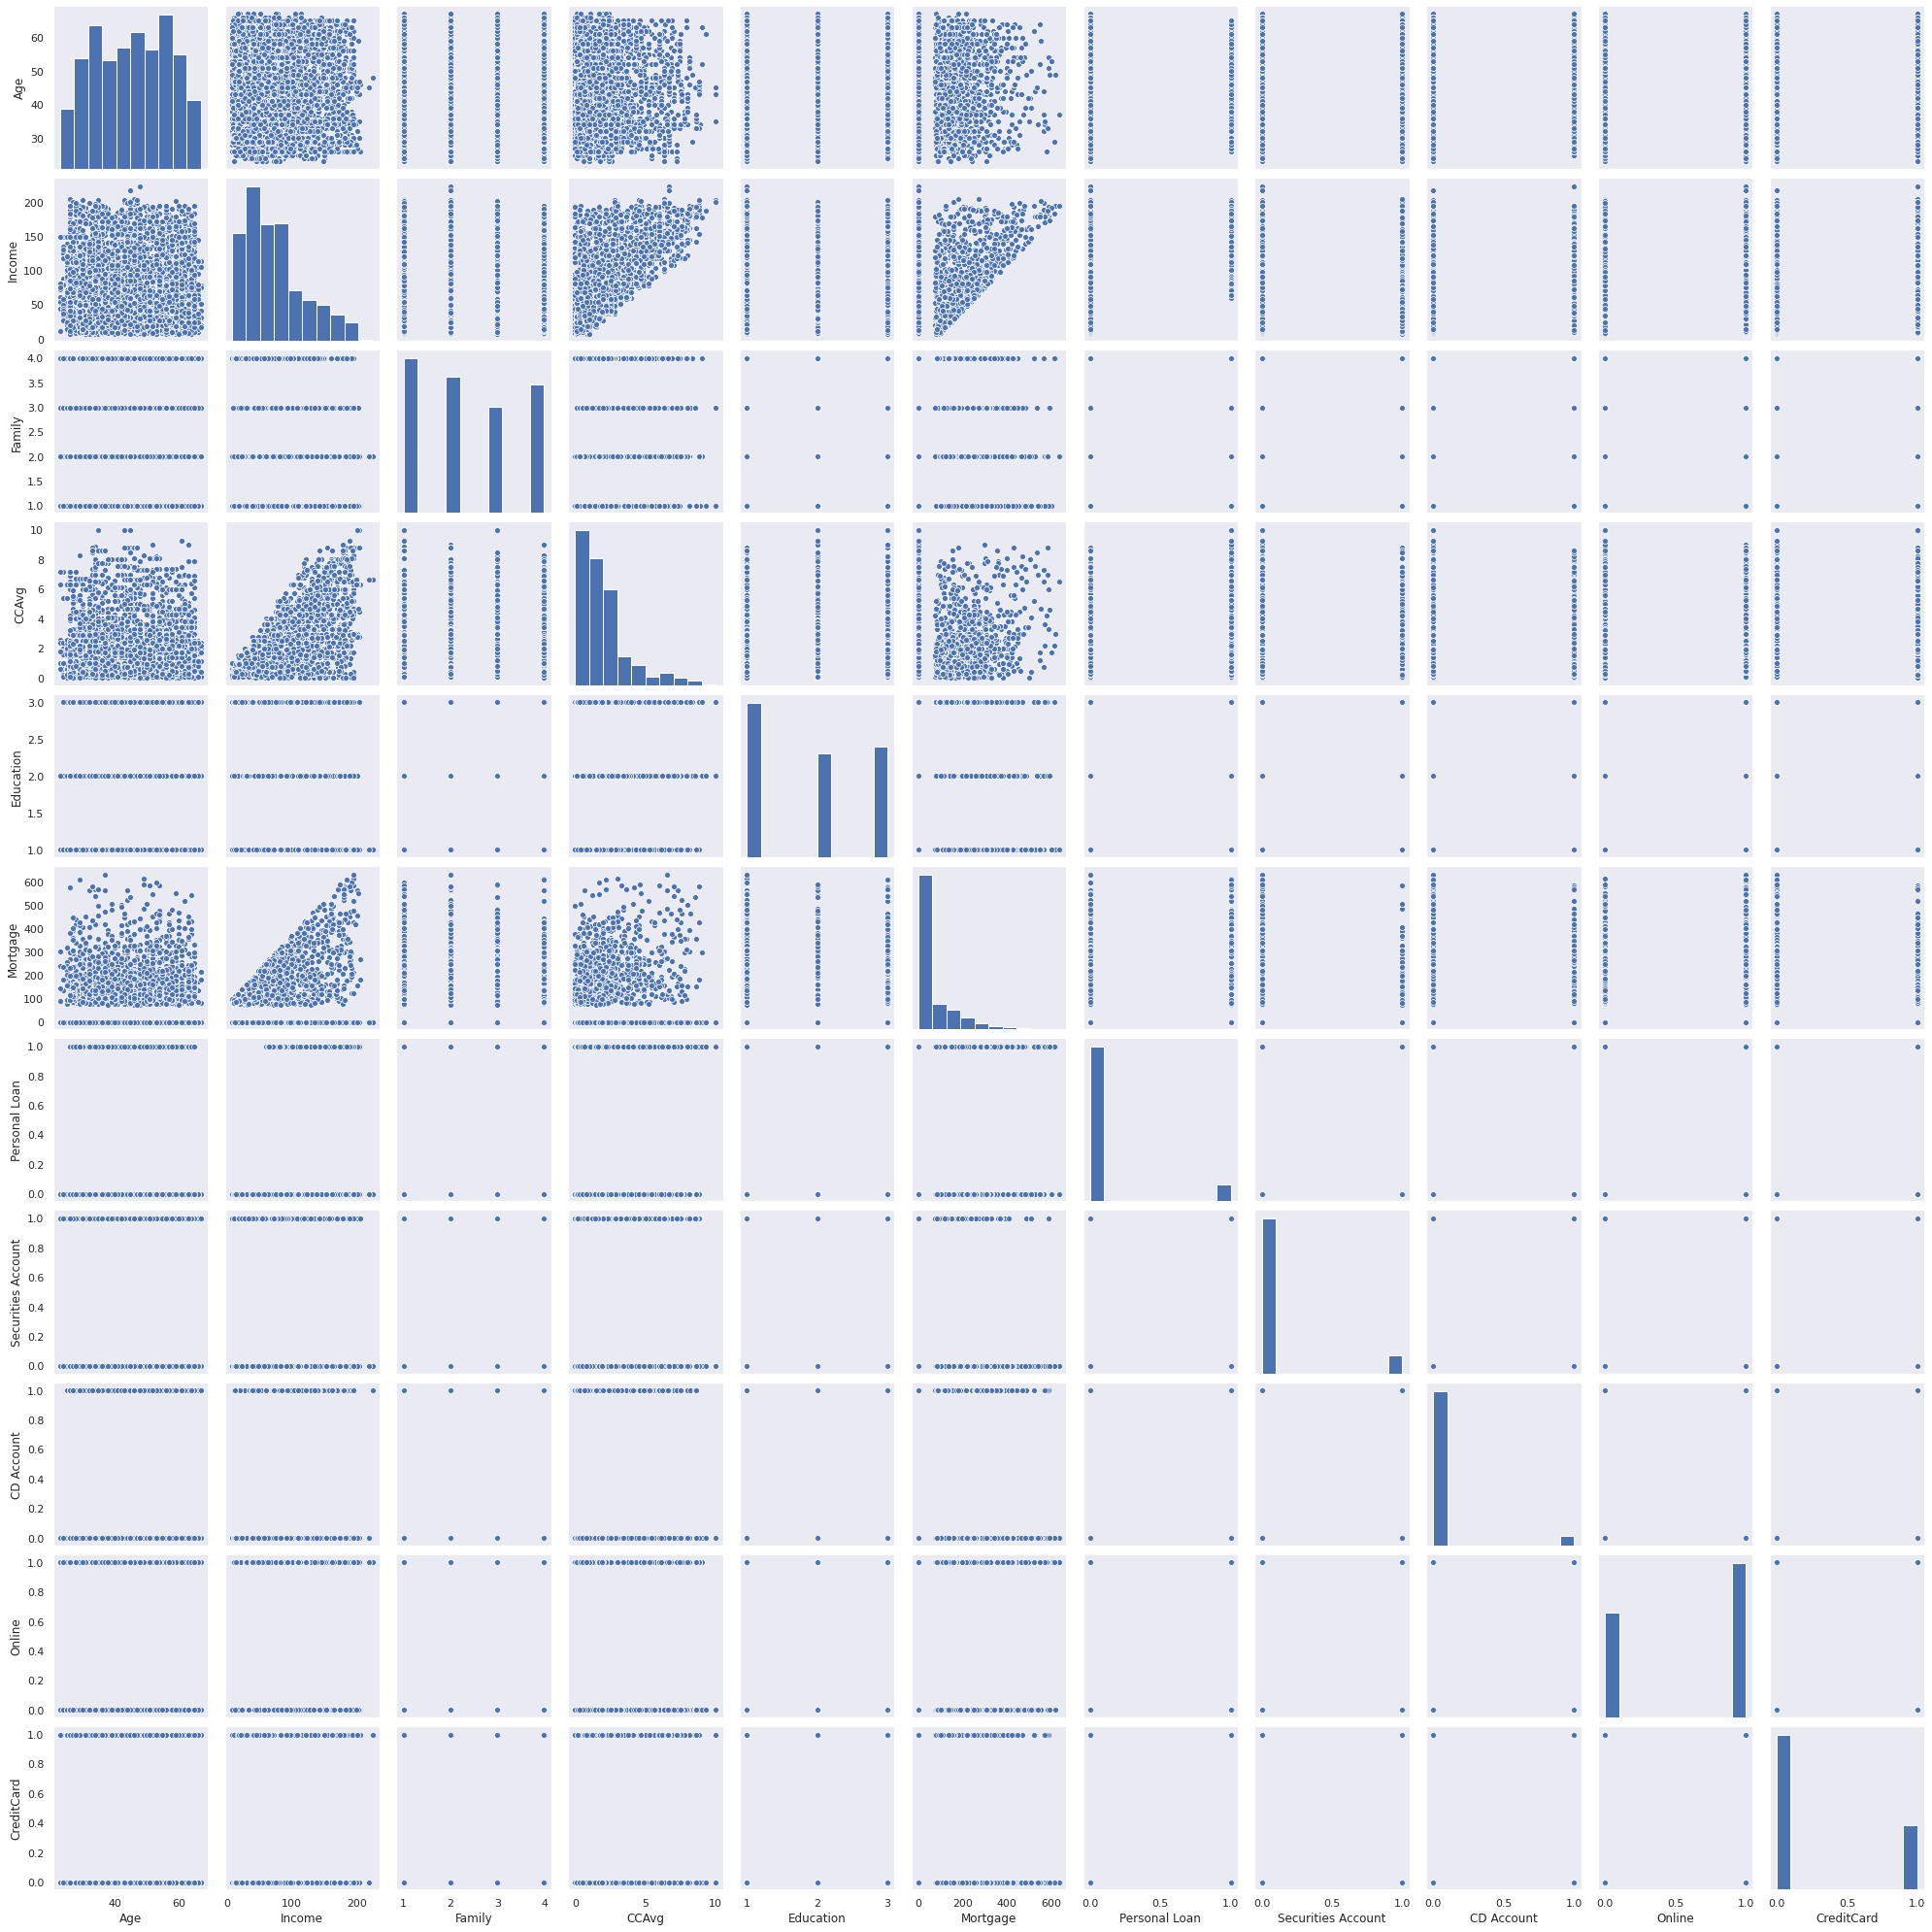

In [ ]:
sns.pairplot(file)



---
#**MULTIVARITE ANALYSIS**



---



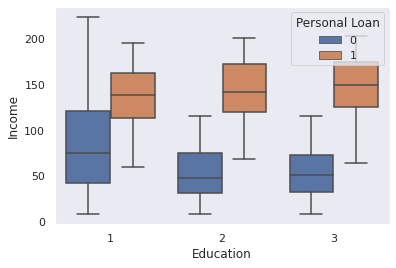

In [ ]:
#Analysis between income and education and personal loan.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=file);

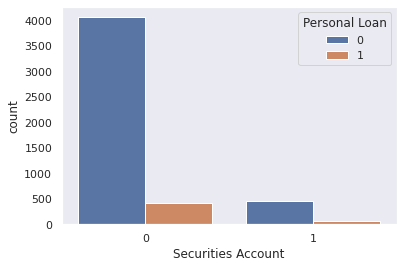

In [ ]:
#Analysis between securities account and personal loan.
sns.countplot(x="Securities Account",data=file,hue="Personal Loan");

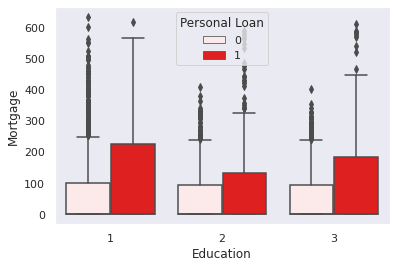

In [ ]:
#Analysis betwwen education,Mortgage and Personal loan.
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=file,color='red')


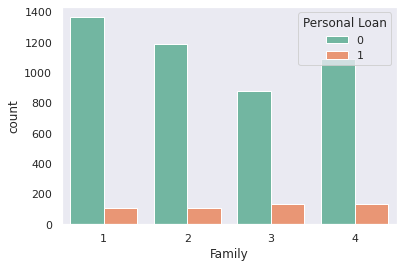

In [ ]:
#Analysis betwwen family and personaal loan
sns.countplot(x='Family',data=file,hue='Personal Loan',palette='Set2')


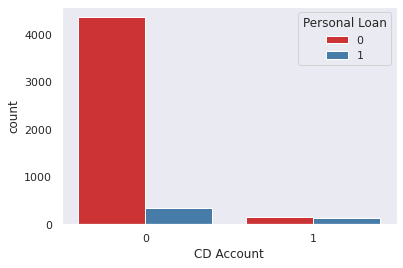

In [ ]:
#Analysis between CD account and personal loan
sns.countplot(x='CD Account',data=file,hue='Personal Loan',palette='Set1')


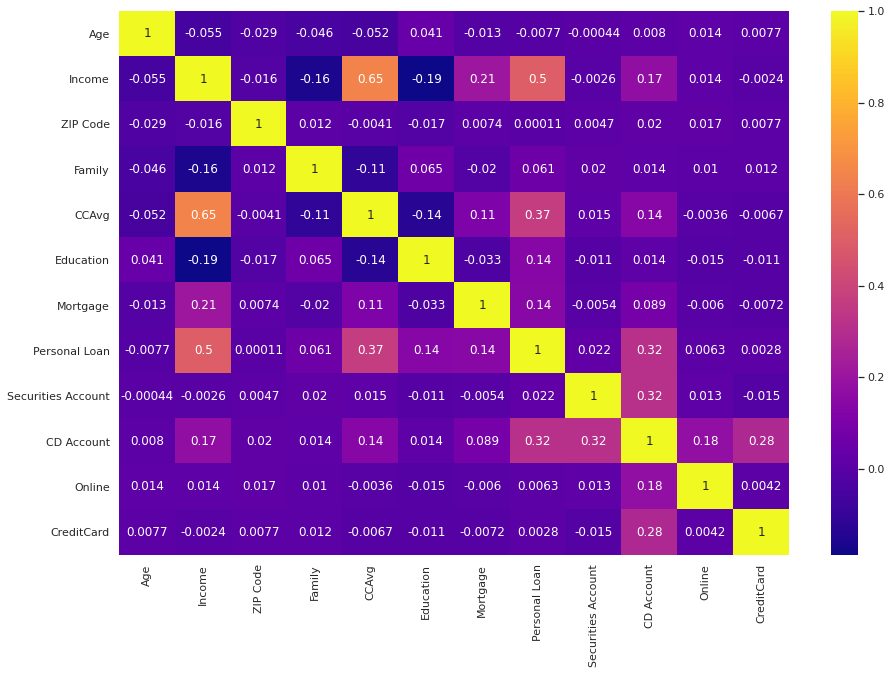

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(file.corr(),cmap='plasma', annot=True)



---


This shows the analysis of the entire data

It can be obsereved the information regarding ZIP Code is not neccesary. So we can drop it.


---





---
**DROPPING ZIPCODE**


---





In [ ]:
file=file.drop('ZIP Code',axis = 1)

In [ ]:
file.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1




---
The ZIPCode is now dropped from the data.


---





---


#**APPLYING TRANSFORMATION ON THE DATA**


---





---


Since we can notice Mortgage,Income and CCAvg have skewed distrubution.

 We try to normalize it.


---



In [ ]:
x = file[['Age','Income','Family','CCAvg','Online','CreditCard','Education','Mortgage','Securities Account','CD Account']]
y = file['Personal Loan'].values

In [ ]:
x['MortgageN'] = pd.cut(x['Mortgage'], bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest= True)
x.drop('Mortgage',axis=1,inplace=True)



---


As there is no significance of Mortgage on the dataset.

We drop Mortgage.


---



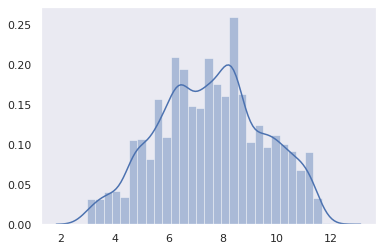

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))



---
Now we gave normalized Income.


---





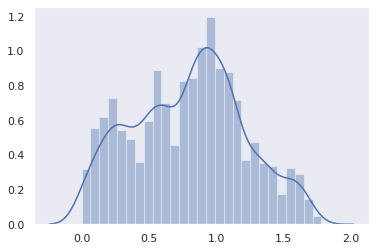

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))






---
Now we have normalized CCAvg.


---






---
#**SPLITING OF DATA INTO TEST AND TRAIN SET**


---




In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y ,test_size=0.3 , random_state=100,stratify = y)
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy = StandardScaler()
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))



array([[-1.76565349, -0.06026123,  1.38884789, ...,  2.87816254,
        -0.26397377, -0.47632119],
       [-1.67867671, -0.56249017,  0.51988693, ..., -0.34744389,
        -0.26397377, -0.47632119],
       [ 1.53946416, -0.62799829,  1.38884789, ..., -0.34744389,
        -0.26397377, -0.47632119],
       ...,
       [ 0.14783568, -1.19573535, -1.21803499, ..., -0.34744389,
        -0.26397377, -0.47632119],
       [-0.02611788, -0.75901454, -0.34907403, ..., -0.34744389,
        -0.26397377, -0.47632119],
       [-1.67867671,  0.31095146, -0.34907403, ..., -0.34744389,
        -0.26397377, -0.47632119]])



---
Now after splitting the dataset into train and test set. 

We have transformed the data.

Now we apply various models to predict the most accurate result.


---






---
#**DECISION TREE**


---




A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
dtmodel= DecisionTreeClassifier(max_depth = 4)
dtmodel.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dt =dtmodel.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix 

In [ ]:
print("The test score for decision tree:" , metrics.accuracy_score(y_test,y_pred_dt))

The test score for decision tree: 0.9813333333333333


In [ ]:
print("The train score for decison tree:" ,  metrics.accuracy_score(y_train,dtmodel.predict(x_train)))

The train score for decison tree: 0.9831428571428571


In [ ]:
from  sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.98      0.83      0.89       144

    accuracy                           0.98      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_dt))

Confusion matrix
[[1353    3]
 [  25  119]]




---
The accuracy of decision tree model for test data is 98.31%

From confusion matrix we notice that false negative is also very less.

Decision Tree model is working really good.


---







---
#**LOGISTIC REGRESSION MODEL**




---
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[(or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


---




In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred =model.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix 

In [ ]:
print("The test score for Logistic Regression:" , metrics.accuracy_score(y_test,y_pred))

The test score for Logistic Regression: 0.9506666666666667


In [ ]:
print("The train score for logisitic regression:" , metrics.accuracy_score(y_train,model.predict(x_train)))

The train score for logisitic regression: 0.9494285714285714


In [ ]:
from  sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.84      0.60      0.70       144

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[1339   17]
 [  57   87]]




---
The accuracy of the logistic regression model for test data is 95.066%

The false negative number is more when compared to the decision tree.

This is a good model.


---






---
#**NAIVE BAYES**


---






---
Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

 P(A|B) = (P(B/A)P(A))/P(B)

where A and B are events and P(B)


---




In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = naive_model.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix 

In [ ]:
print("The test score for Naive Bayes:" , metrics.accuracy_score(y_test,y_pred_nb))

The test score for Naive Bayes: 0.8886666666666667


In [ ]:
print("The train score for Naive Bayes:" , metrics.accuracy_score(y_train,naive_model.predict(x_train)))

The train score for Naive Bayes: 0.88


In [ ]:
from  sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_nb))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1356
           1       0.44      0.55      0.49       144

    accuracy                           0.89      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.89      0.89      1500



In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_nb))

Confusion matrix
[[1254  102]
 [  65   79]]




---
The accuracy for the naive bayes model for test data is 88.88%

Based on the confusion matrix,We notice that the false negative score is high.

Naive Bayes model is compartively not as good as Decision Tree and Logistic regression.


---







---
#**RANDOM FOREST MODEL**


---






---
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


---



In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_clf = clf.predict(x_test)

In [ ]:
print("The test score for Random forest:" , metrics.accuracy_score(y_test,y_pred_clf))

The test score for Random forest: 0.988


In [ ]:
print("The train score for Random fores:" , metrics.accuracy_score(y_train,clf.predict(x_train)))

The train score for Random fores: 1.0


In [ ]:
from  sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_clf))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_clf))

Confusion matrix
[[1355    1]
 [  17  127]]




---
The accuracy of the random tree model for test data is 98.8%

From confusion matrix,we observe that the false negative score is  very less.

This model is one of the best models so far.


---






---
#**KNN CLASSIFIER**


---






---
K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures. 

Classification is done by a majority vote to its neighbors.


---




In [ ]:
#KNN ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
model_k = KNeighborsClassifier(n_neighbors=3)
model_k.fit(x_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_k = model_k.predict(x_test)

In [ ]:
print("Test score for KNN :" , metrics.accuracy_score(y_test,y_pred_k))

Test score for KNN : 0.92


In [ ]:
print("The train score for KNN:" , metrics.accuracy_score(y_train,model_k.predict(x_train)))

The train score for KNN: 0.9634285714285714


In [ ]:
from  sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_k))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1356
           1       0.62      0.44      0.51       144

    accuracy                           0.92      1500
   macro avg       0.78      0.70      0.73      1500
weighted avg       0.91      0.92      0.91      1500



In [ ]:

print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_k))

Confusion matrix
[[1317   39]
 [  81   63]]




---


The accuracy of the KNN Classifier for test data is 92%

Based on the confusion matrix,we notice the false negative score is high.

This is not as a good model of the Random forest or the decision tree.


---





---
#**SVM**


---






---
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. 

---





In [ ]:
#SVM
from sklearn import svm
clf_svm = svm.SVC()
clf_svm = clf_svm.fit(x_train,y_train)

In [ ]:
y_pred_svm = clf_svm.predict(x_test)

In [ ]:
print("Test score for SVM:" , metrics.accuracy_score(y_test,y_pred_svm))

Test score for SVM: 0.904


In [ ]:
print("The train score for SVN:" , metrics.accuracy_score(y_train,clf_svm.predict(x_train)))

The train score for SVN: 0.904


In [ ]:
from  sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred_svm))

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       0.00      0.00      0.00       144

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.82      0.90      0.86      1500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_svm))

Confusion matrix
[[1356    0]
 [ 144    0]]




---
The accuracy of the SVM of the test data is 90.4%

The confusion matrix has a lot of the false negative.

The SVM is not as a good model as the others.


---






---
# **REPORT**


---






---
**DECISION TREE**

The accuracy of decision tree model for test data is 98.31%

From confusion matrix we notice that false negative is also very less.

Decision Tree model is working really good.



---
**LOGISTIC REGRESSION**

The accuracy of the logistic regression model for test data is 95.066%

The false negative number is more when compared to the decision tree.

This is a good model.


---

**NAIVE BAYES**

The accuracy for the naive bayes model for test data is 88.88%

Based on the confusion matrix,We notice that the false negative score is high.

Naive Bayes model is compartively not as good as Decision Tree and Logistic regression.


---
**RANDOM FOREST**

The accuracy of the random tree model for test data is 98.8%

From confusion matrix,we observe that the false negative score is  very less.

This model is one of the best models so far.


---

**KNN CLASSIFIER**

The accuracy of the KNN Classifier for test data is 92%

Based on the confusion matrix,we notice the false negative score is high.

This is not as a good model of the Random forest or the decision tree.


---
**SVM**
The accuracy of the SVM of the test data is 90.4%

The confusion matrix has a lot of the false negative.

The SVM is not as a good model as the others.


---

Thereby we can conclude that best model among all of these is **RANDOM FOREST CLASSIFIER**


---

















---


##**SUMMARY**


---







As discussed earlier,the outcome of this project is to get maximum number of customers to apply for personal loans from the bank.

Here the data and the neccesary libraries are imported.

Then data description is observed and analyzed. The noise data like ID is dropped in order to clean the dataset. We also drop ZIP Code.

We notice that Age and Experience is highly correlated and hence thereby drop the experience data.

We perform univariate and multivariate analysis and draw various conclusions drawn which has been mentioned above.

We also normalize the skewed data(CCAvg and Income) by using power transformation. we normalize Mortgage by the binning technique.

After this we apply many details and predict the number of the potential bank customers.



---
# **CONCLUSION**


---
The machine learning model developed is thereby succesfull in predicting the number of and the information about potential customers who would most likely apply a loan from the bank.

This model also will help the bank avoid risky customers and hence minimize the losses of the lender.

The model perfectly explains the balance between the profits and risks for the bank using various methods.



